In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob

In [2]:
epochs = 100
lr = 1e-3
batch_size = 64
img_dims = (96,96,3)

data = []
labels = []

In [7]:
image_files = [f for f in glob.glob('dataset/**/*', recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)

In [8]:
len(image_files)

4095

In [11]:
for img in image_files:

    image = cv2.imread(img)
    try:
        image = cv2.resize(image, (img_dims[0],img_dims[1]))
        image = img_to_array(image)
        data.append(image)
    except Exception as e:
        continue
    label = img.split(os.path.sep)[-2] # C:\Files\gender_dataset_face\woman\face_1162.jpg
    if label == "without_mask":
        label = 1
    else:
        label = 0
        
    labels.append([label])

In [12]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [13]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2,
                                                  random_state=42)

trainY = to_categorical(trainY, num_classes=2) # [[1, 0], [0, 1], [0, 1], ...]
testY = to_categorical(testY, num_classes=2)

In [14]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

In [15]:
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first": #Returns a string, either 'channels_first' or 'channels_last'
        inputShape = (depth, height, width)
        chanDim = 1
    
    # The axis that should be normalized, after a Conv2D layer with data_format="channels_first", 
    # set axis=1 in BatchNormalization.

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model


In [17]:
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
                            classes=2)

# compile the model
opt = Adam(lr=lr, decay=lr/epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [18]:
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(testX,testY),
                        steps_per_epoch=len(trainX) // batch_size,
                        epochs=epochs, verbose=1)

c:\users\francis\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
55/55 [==============================] - 39s 688ms/step - loss: 0.4268 - accuracy: 0.8702 - val_loss: 1.6720 - val_accuracy: 0.4836
Epoch 2/100
55/55 [==============================] - 42s 766ms/step - loss: 0.2495 - accuracy: 0.9161 - val_loss: 2.6934 - val_accuracy: 0.4836
Epoch 3/100
55/55 [==============================] - 39s 709ms/step - loss: 0.2231 - accuracy: 0.9239 - val_loss: 3.7345 - val_accuracy: 0.4836
Epoch 4/100
55/55 [==============================] - 34s 613ms/step - loss: 0.1906 - accuracy: 0.9276 - val_loss: 4.7615 - val_accuracy: 0.4836
Epoch 5/100
55/55 [==============================] - 34s 619ms/step - loss: 0.1968 - accuracy: 0.9299 - val_loss: 2.6357 - val_accuracy: 0.5345
Epoch 6/100
55/55 [==============================] - 34s 613ms/step - loss: 0.1770 - accuracy: 0.9348 - val_loss: 2.2990 - val_accuracy: 0.6580
Epoch 7/100
55/55 [==============================] - 34s 614ms/step - loss: 0.1632 - accuracy: 0.9418 - val_loss: 0.6097 - val_accuracy:

55/55 [==============================] - 43s 771ms/step - loss: 0.0398 - accuracy: 0.9847 - val_loss: 0.3975 - val_accuracy: 0.8494
Epoch 58/100
55/55 [==============================] - 41s 743ms/step - loss: 0.0370 - accuracy: 0.9879 - val_loss: 0.0745 - val_accuracy: 0.9807
Epoch 59/100
55/55 [==============================] - 41s 736ms/step - loss: 0.0349 - accuracy: 0.9879 - val_loss: 0.0847 - val_accuracy: 0.9773
Epoch 60/100
55/55 [==============================] - 42s 761ms/step - loss: 0.0234 - accuracy: 0.9919 - val_loss: 0.0388 - val_accuracy: 0.9898
Epoch 61/100
55/55 [==============================] - 42s 762ms/step - loss: 0.0244 - accuracy: 0.9913 - val_loss: 0.0478 - val_accuracy: 0.9909
Epoch 62/100
55/55 [==============================] - 43s 778ms/step - loss: 0.0273 - accuracy: 0.9905 - val_loss: 0.2515 - val_accuracy: 0.9151
Epoch 63/100
55/55 [==============================] - 42s 773ms/step - loss: 0.0315 - accuracy: 0.9905 - val_loss: 0.3392 - val_accuracy: 0.882

In [19]:
model.save('mask_detection.model')

INFO:tensorflow:Assets written to: mask_detection.model\assets


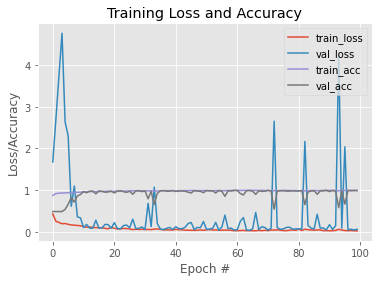

In [20]:
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

# save plot to disk
plt.savefig('plot.png')